DATA QUALITY

In [1]:
import pandas as pd
BeforeIntegrationDataset = pd.read_csv('before_integration_kent_accidents.csv') #kent 2022 dataset
AfterIntegrationDataset = pd.read_csv('after_integration_kent_accidents.csv') #accidents from the RDBMS folder

In [2]:
# Basic information about the DataFrame
BeforeIntegrationDataset.info()
BeforeIntegrationDataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accident_Date            5256 non-null   object 
 1   District_Area            5256 non-null   object 
 2   Latitude                 5256 non-null   float64
 3   Longitude                5256 non-null   float64
 4   Road_Type                4968 non-null   object 
 5   Urban_or_Rural_Area      5256 non-null   object 
 6   Light_Conditions         5256 non-null   object 
 7   Road_Surface_Conditions  5256 non-null   object 
 8   Number_of_Vehicles       5256 non-null   int64  
 9   Vehicle_Type             5256 non-null   object 
 10  Accident_Severity        5256 non-null   object 
 11  Number_of_Casualties     5256 non-null   int64  
 12  Weather_Conditions       4968 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 533.9+ KB


Latitude    Longitude  Number_of_Vehicles  Number_of_Casualties
count  5256.000000  5256.000000         5256.000000           5256.000000
mean     51.351984     0.338109            1.833524              1.054795
std       0.124908     0.267842            0.732725              0.227600
min      51.000019     0.000052            1.000000              1.000000
25%      51.276747     0.106349            1.000000              1.000000
50%      51.393019     0.266304            2.000000              1.000000
75%      51.447509     0.532535            2.000000              1.000000
max      51.499910     0.997707           11.000000              2.000000

Checking for Completeness

In [3]:
# Check for missing values
BeforeIntegrationDataset.isnull().sum()

Accident_Date                0
District_Area                0
Latitude                     0
Longitude                    0
Road_Type                  288
Urban_or_Rural_Area          0
Light_Conditions             0
Road_Surface_Conditions      0
Number_of_Vehicles           0
Vehicle_Type                 0
Accident_Severity            0
Number_of_Casualties         0
Weather_Conditions         288
dtype: int64

In [4]:
import pandas as pd


# Calculate the percentage of missing values for each column
missing_percentage = (BeforeIntegrationDataset.isnull().sum() / len(BeforeIntegrationDataset)) * 100

# Create a DataFrame to display the results
missing_data_info = pd.DataFrame({
    'Column': BeforeIntegrationDataset.columns,
    'Missing Percentage': missing_percentage
})

# Display the DataFrame
print(missing_data_info)


                                          Column  Missing Percentage
Accident_Date                      Accident_Date            0.000000
District_Area                      District_Area            0.000000
Latitude                                Latitude            0.000000
Longitude                              Longitude            0.000000
Road_Type                              Road_Type            5.479452
Urban_or_Rural_Area          Urban_or_Rural_Area            0.000000
Light_Conditions                Light_Conditions            0.000000
Road_Surface_Conditions  Road_Surface_Conditions            0.000000
Number_of_Vehicles            Number_of_Vehicles            0.000000
Vehicle_Type                        Vehicle_Type            0.000000
Accident_Severity              Accident_Severity            0.000000
Number_of_Casualties        Number_of_Casualties            0.000000
Weather_Conditions            Weather_Conditions            5.479452


In [5]:
import pandas as pd


# Calculate the total number of missing values in the entire DataFrame
total_missing_values = BeforeIntegrationDataset.isnull().sum().sum()

# Calculate the total number of cells in the DataFrame
total_cells = BeforeIntegrationDataset.size

# Calculate the completeness percentage
completeness_percentage = ((total_cells - total_missing_values) / total_cells) * 100

# Display the results
print("Total Missing Values:", total_missing_values)
print("Total Cells in the DataFrame:", total_cells)
print("Completeness Percentage:", completeness_percentage, "%")


Total Missing Values: 576
Total Cells in the DataFrame: 68328
Completeness Percentage: 99.15700737618546 %


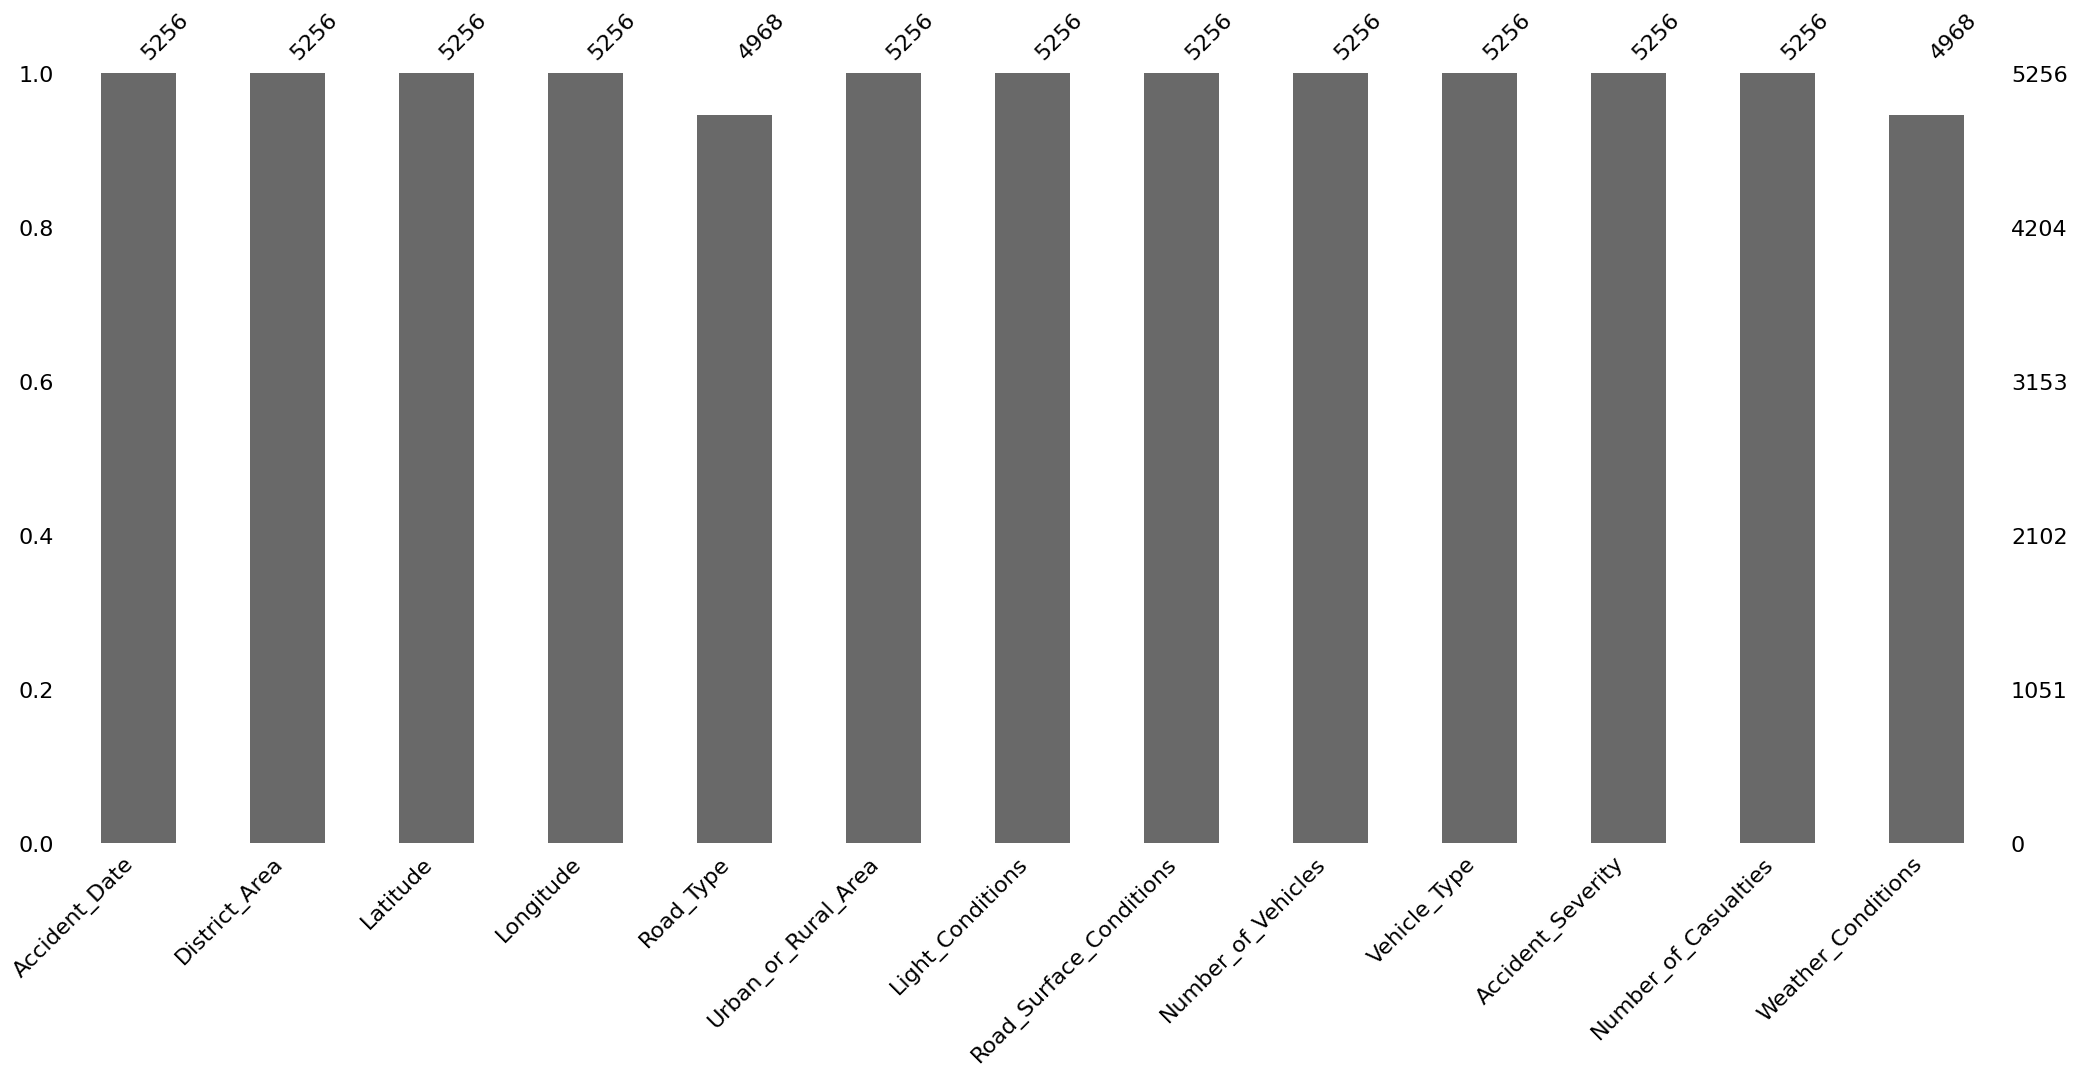

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named BeforeIntegrationDataset
msno.bar(BeforeIntegrationDataset)
plt.show()


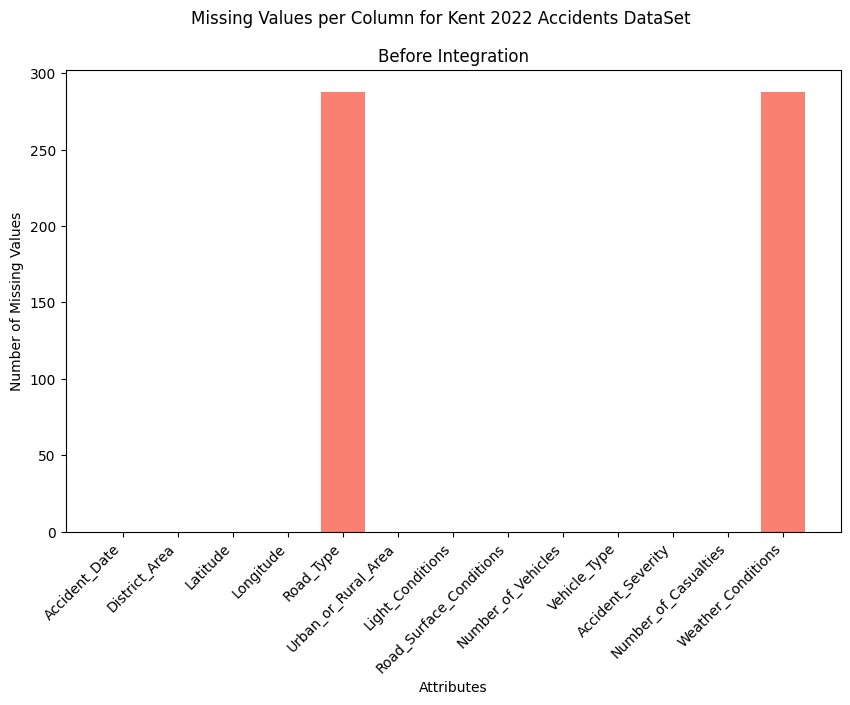

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named BeforeIntegrationDataset
missing_values = BeforeIntegrationDataset.isnull().sum()

# Set color based on missing values
colors = ['skyblue' if val == 0 else 'salmon' for val in missing_values]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values, color=colors)
plt.xlabel('Attributes')
plt.ylabel('Number of Missing Values')
plt.title('Before Integration')
plt.suptitle('Missing Values per Column for Kent 2022 Accidents DataSet')
plt.xticks(rotation=45, ha='right')
plt.show()


In [8]:
import missingno as msno
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named BeforeIntegrationDataset
missing_values = AfterIntegrationDataset.isnull().sum()

# Set color based on missing values
colors = ['skyblue' if val == 0 else 'salmon' for val in missing_values]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values, color=colors)
plt.xlabel('Attributes')
plt.ylabel('Number of Missing Values')
plt.title('After Integration')
plt.suptitle('Missing Values per Column for Kent 2022 Accidents DataSet')
plt.xticks(rotation=45, ha='right')
plt.show()


In [9]:
# Check for duplicated rows
BeforeIntegrationDataset.duplicated().sum()

0

We have 5256 Missing Values for Location and 288 Missing Values for Road_Type - Before the Integration Stage

AFTER INTEGRATION

In [10]:
# Basic information about the DataFrame
AfterIntegrationDataset.info()
AfterIntegrationDataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5256 non-null   int64  
 1   Accident_Date            5256 non-null   object 
 2   location                 5256 non-null   object 
 3   Latitude                 5256 non-null   float64
 4   Longitude                5256 non-null   float64
 5   Light_Conditions         5256 non-null   object 
 6   Road_Surface_Conditions  5256 non-null   object 
 7   Number_of_Vehicles       5256 non-null   int64  
 8   Vehicle_Type             5256 non-null   object 
 9   Accident_Severity        5256 non-null   object 
 10  Number_of_Casualties     5256 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 451.8+ KB


ID     Latitude    Longitude  Number_of_Vehicles  \
count  5256.000000  5256.000000  5256.000000         5256.000000   
mean   2628.500000    51.351984     0.338109            1.833524   
std    1517.420838     0.124908     0.267842            0.732725   
min       1.000000    51.000019     0.000052            1.000000   
25%    1314.750000    51.276747     0.106349            1.000000   
50%    2628.500000    51.393019     0.266304            2.000000   
75%    3942.250000    51.447509     0.532535            2.000000   
max    5256.000000    51.499910     0.997707           11.000000   

       Number_of_Casualties  
count           5256.000000  
mean               1.054795  
std                0.227600  
min                1.000000  
25%                1.000000  
50%                1.000000  
75%                1.000000  
max                2.000000

In [11]:
# Check for duplicated rows
AfterIntegrationDataset.duplicated().sum()

0

In [12]:
# Check for missing values
AfterIntegrationDataset.isnull().sum()

ID                         0
Accident_Date              0
location                   0
Latitude                   0
Longitude                  0
Light_Conditions           0
Road_Surface_Conditions    0
Number_of_Vehicles         0
Vehicle_Type               0
Accident_Severity          0
Number_of_Casualties       0
dtype: int64

AFTER INTEGRATION we have NO MISSING VALUES for all columns

Custom Data Quality Checks

1. Date Format and Consistency Check

In [13]:
# Check if Accident_Date column is in the correct date format
BeforeIntegrationDataset['Accident_Date'] = pd.to_datetime(BeforeIntegrationDataset['Accident_Date'], errors='coerce')
date_format_check = BeforeIntegrationDataset['Accident_Date'].notnull().all()
print(f"Date Format Check: {date_format_check}")


Date Format Check: True


In [14]:
# Check if Accident_Date column is in the correct date format
AfterIntegrationDataset['Accident_Date'] = pd.to_datetime(AfterIntegrationDataset['Accident_Date'], errors='coerce')
date_format_check = AfterIntegrationDataset['Accident_Date'].notnull().all()
print(f"Date Format Check: {date_format_check}")



Date Format Check: True


2.Geographical Coordinates Check

In [15]:
# Check if Latitude and Longitude values are within valid ranges
latitude_check = (BeforeIntegrationDataset['Latitude'] >= 51.0) & (BeforeIntegrationDataset['Latitude'] <= 51.5)
longitude_check = (BeforeIntegrationDataset['Longitude'] >= 0.0) & (BeforeIntegrationDataset['Longitude'] <= 1.0)
print(f"Latitude Range Check: {latitude_check.all()}")
print(f"Longitude Range Check: {longitude_check.all()}")


Latitude Range Check: True
Longitude Range Check: True


In [16]:
# Check if Latitude and Longitude values are within valid ranges
latitude_check = (AfterIntegrationDataset['Latitude'] >= 51.0) & (AfterIntegrationDataset['Latitude'] <= 51.5)
longitude_check = (AfterIntegrationDataset['Longitude'] >= 0.0) & (AfterIntegrationDataset['Longitude'] <= 1.0)
print(f"Latitude Range Check: {latitude_check.all()}")
print(f"Longitude Range Check: {longitude_check.all()}")

Latitude Range Check: True
Longitude Range Check: True


VISUAL DATA PROFILING

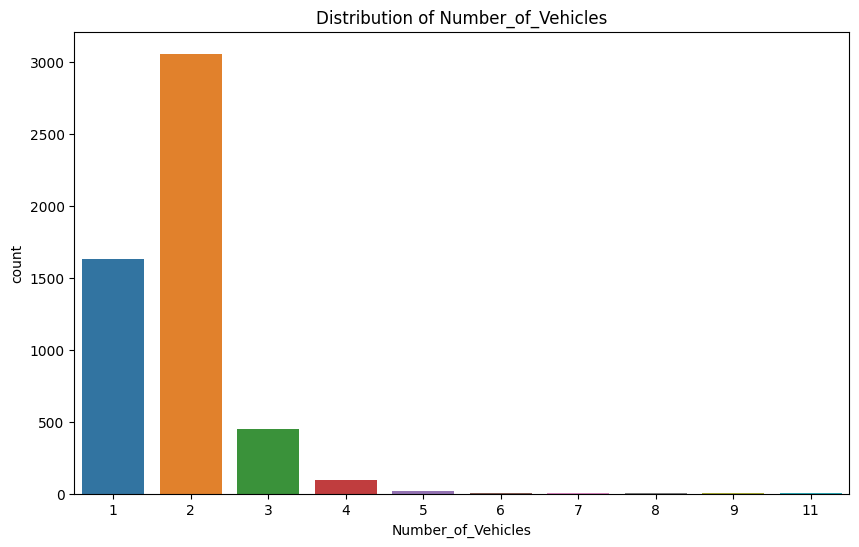

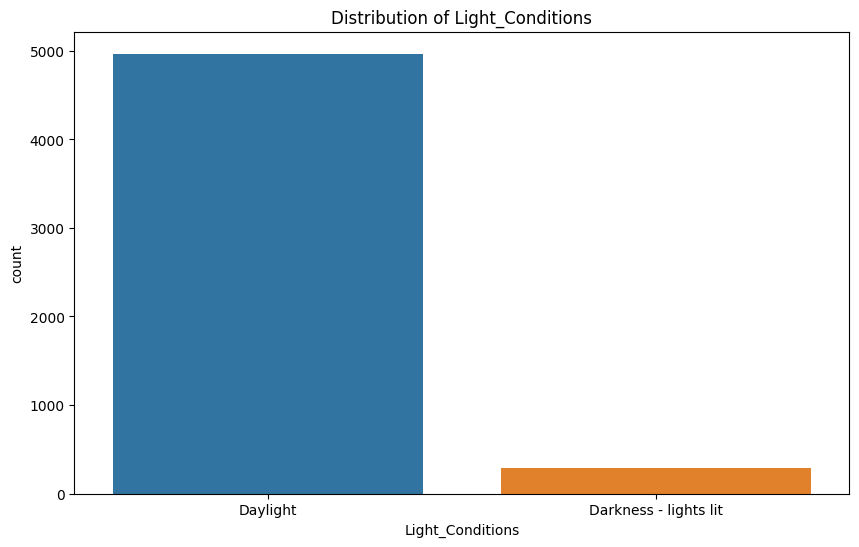

In [18]:
# Visualize distribution of categorical variables
import seaborn as sns
categorical_columns =['Number_of_Vehicles', 'Accident_Severity', 'Number_of_Casualties' ,'Road_Surface_Conditions','Light_Conditions','Vehicle_Type']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=AfterIntegrationDataset)
    plt.title(f'Distribution of {col}')
    plt.show()


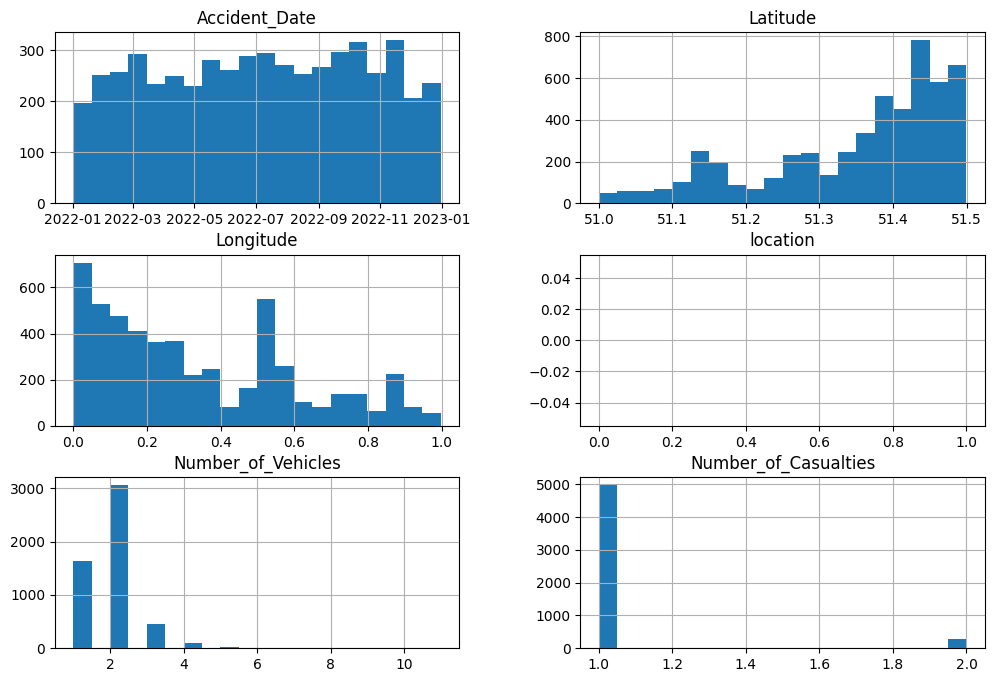

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
BeforeIntegrationDataset.hist(bins=20, figsize=(12, 8))
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
AfterIntegrationDataset.hist(bins=20, figsize=(12, 8))
plt.show()


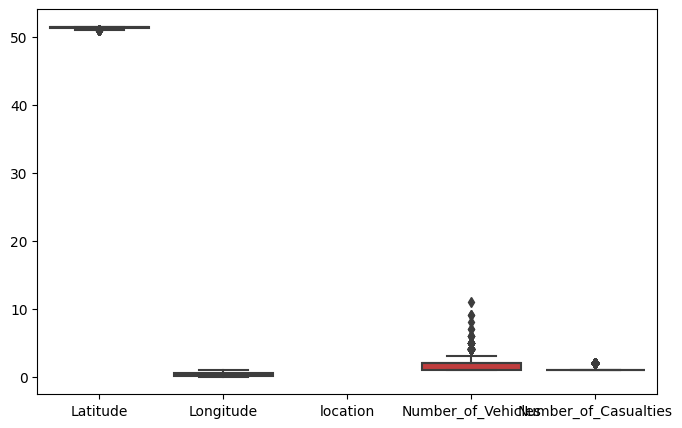

In [ ]:
import seaborn as sns

# Plot box plots for numerical columns
plt.figure(figsize=(8, 5))
sns.boxplot(data=BeforeIntegrationDataset)
plt.show()


In [ ]:
import seaborn as sns
selected_columns = ['Latitude', 'Longitude', 'location', 'Number_of_Vehicles', 'Number_of_Casualties']
# Plot box plots for numerical columns
plt.figure(figsize=(8, 5))
sns.boxplot(data=AfterIntegrationDataset[selected_columns])
plt.show()


DISTRICT AREA


In [ ]:
DistrictAreaDataset=pd.read_csv('District_Area.csv')